<a href="https://colab.research.google.com/github/carlotamartin/Trazabilidad-de-los-tomates/blob/main/2_Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rendimiento del tomate
El objetivo del trabajo es poder clasificar si un tomate tiene una frescura óptima. Para ello en nuestro trabajo vamos a implementar un algortimo de clasificiación con el rendimiento del tomate. 

Hay diferentes formas de evaluar el rendimiento de los tomates. Una posible opción es crear una fórmula matemática que relacione las variables relevantes, por ejemplo, el tipo de tomate, el índice de madurez, el calibre y la acidez, y asignar un puntaje a cada tomate en base a esa fórmula. A partir de ese puntaje, se puede establecer un umbral para determinar si el tomate es fresco o no.

Vamos a emplear la siguiente fórmula matemática:


$frescura = \left[ \left( \frac{Brix + Índice madurez}{2} \right) \right] - \left[ \left( \frac{Acidez + (100 - Agua)}{2} \right) \right] * \left( \frac{1}{Calibre} \right)$

Donde:


*   Brix: medida de la cantidad de azúcar en el tomate
*   Índice madurez: medida de la madurez del tomate
*   Acidez: medida de la cantidad de ácido en el tomate
*   Agua: medida de la cantidad de agua en el tomate
*   Calibre: medida del tamaño del tomate


La fórmula se basa en la idea de que la frescura del tomate está relacionada con su dulzura (representada por el Brix y el índice de madurez) y su acidez (representada por la acidez y el contenido de agua). Además, el tamaño del tomate también puede influir en su frescura.

La fórmula da como resultado un número, donde un valor más alto indica mayor frescura y un valor más bajo indica menor frescura. 

Esta fómula la vamos a emplear en clasificar los tomates en frescos o no frescos. Por ejemplo, si el valor de la frescura es mayor a 0.5 podemos considerar que el tomate está fresco, y si es menor a 0.5 se considera que no lo está.

## Lectura de los datos

Importamos las librerías necesarias



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

  ### **Loading data**  

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/datos_juntos.csv')
data.head()

,Unnamed: 0.1,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno
0,1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí
1,2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí
2,3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí
3,4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí
4,5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí


In [ ]:
def frescura(df):
    return ((df['Brix'] + df['Índice padurez']) / 2) - ((df['Acidez'] + (100 - df['Agua'])) / 2) * (1 / df['Calibre'])

In [ ]:
# Crear una nueva columna con el resultado de la fórmula
data["frescura"] = data.apply(frescura, axis=1)

In [ ]:
data.head()

,Unnamed: 0.1,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,8.879375
1,2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,8.869444
2,3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,8.985000
3,4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,8.920833
4,5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,9.375000


In [ ]:
data['frescura'].describe()

count    12006.000000
mean         8.400623
std          2.032650
min         -2.420000
25%          7.982708
50%          8.902917
75%          9.601111
max         12.130000
Name: frescura, dtype: float64

In [ ]:
data.describe()

,Unnamed: 0.1,temperature,humidity,latitud,longitud,Unnamed: 0,Brix,Acidez,Agua,Índice padurez,Calibre,frescura
count,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,8509.469099,14.018574,55.673330,36.950439,-2.498799,8509.469099,6.017290,0.478490,92.951528,13.093227,6.910212,8.400623
std,4921.970508,2.305542,9.304219,0.144704,0.173482,4921.970508,1.487633,0.182611,4.109982,2.025334,2.901883,2.032650
min,1.000000,8.000000,40.000000,36.700015,-2.799959,1.000000,2.410000,0.200000,81.040000,7.800000,1.000000,-2.420000
25%,4238.250000,13.000000,47.000000,36.825576,-2.648889,4238.250000,5.160000,0.330000,89.312500,12.140000,6.000000,7.982708
50%,8506.500000,14.000000,55.000000,36.950484,-2.500747,8506.500000,6.130000,0.430000,94.410000,13.110000,7.000000,8.902917
75%,12774.750000,15.000000,64.000000,37.075854,-2.347125,12774.750000,7.080000,0.610000,95.990000,14.230000,9.000000,9.601111
max,16999.000000,21.000000,72.000000,37.199941,-2.200005,16999.000000,10.000000,1.000000,97.900000,19.900000,13.000000,12.130000


Como podemos observar, el rendimiento nos aparece con un rango $\left[-2.420000,12.130000\right]$. Para poder evaluar si el toamte es fresco, vamos a normalizar los datos escalándolos del$\left[0, 1\right]$.

Con esto vamos a clasificar la frescura del tomate de la siguiente manera:


*   frescura > 0.75 --> True
*   frescura < 0.75 --> False

Para realizar la normalización de los datos, vamos a emplear la librería de `sklearn`, utilizando la función `MinMaxScaler`

In [ ]:
#Importamos la librería
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Normalizar la columna de frescura
data["frescura"] = scaler.fit_transform(data[["frescura"]])


In [ ]:
data

,Unnamed: 0.1,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,0.776589
1,2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,0.775907
2,3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,0.783849
3,4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,0.779439
4,5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,0.810653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,16995,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,16995,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí,0.774178
12002,16996,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,16996,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí,0.824948
12003,16997,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,16997,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí,0.733814
12004,16998,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,16998,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí,0.781644


In [ ]:
data['frescura'].describe()

count    12006.000000
mean         0.743685
std          0.139701
min          0.000000
25%          0.714963
50%          0.778207
75%          0.826193
max          1.000000
Name: frescura, dtype: float64

In [ ]:

# Crear una nueva columna con la clasificación de frescura
data["frescura"] = np.where(data["frescura"] > 0.75, True, False)

In [ ]:
data

,Unnamed: 0.1,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,16995,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,16995,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí,True
12002,16996,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,16996,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí,True
12003,16997,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,16997,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí,False
12004,16998,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,16998,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí,True


In [ ]:
data['frescura'].value_counts()

True     7566
False    4440
Name: frescura, dtype: int64

Por lo tanto ya tenemos el dataframe perfecto para analizarlo. Lo descargamos y en el siguiente notebook lo analizamos

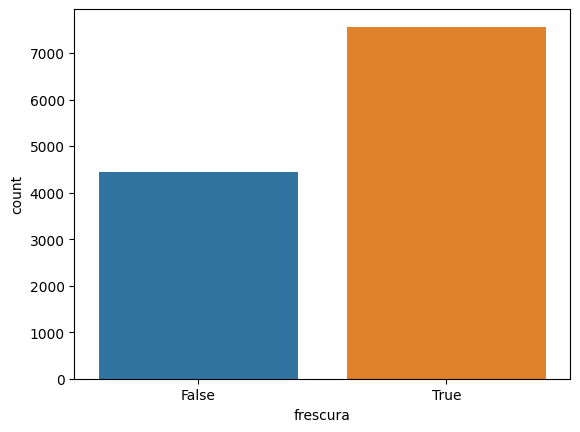

In [ ]:
sns.countplot(data=data, x = 'frescura');

In [ ]:
data.to_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/Data_rendimiento.csv', sep=',')